In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#UN-COMMENT OUT IF YOU ARE USING GOOGLE COLLAB
identification = ['unit_no', 'cycle_times']
operationalsettings = ['ops_1', 'ops_2', 'ops_3']
sensors = ['s_{}'.format(i) for i in range(1,22)]
columnnames = identification + operationalsettings + sensors

train_file_path = '/content/drive/MyDrive/OMSA Final Project/MGT 6748/CMAPSSData/train_FD001.txt'
test_file_path = '/content/drive/MyDrive/OMSA Final Project/MGT 6748/CMAPSSData/test_FD001.txt'
rul_file_path = '/content/drive/MyDrive/OMSA Final Project/MGT 6748/CMAPSSData/RUL_FD001.txt'

traindf = pd.read_csv(train_file_path, sep=r'\s+', header=None, names = columnnames)
testdf = pd.read_csv(test_file_path, sep=r'\s+', header=None, names = columnnames)
test_rul = pd.read_csv(rul_file_path, sep=r'\s+', header=None, names=['RUL'])

In [ ]:
testdf.shape

(13096, 26)

In [ ]:
test_rul.shape

(100, 1)

### <b>IMPORT THE DATASETS</b>

In [ ]:
# identification = ['unit_no', 'cycle_times']
# operationalsettings = ['ops_1', 'ops_2', 'ops_3']
# sensors = ['s_{}'.format(i) for i in range(1,22)]
# columnnames = identification + operationalsettings + sensors

In [ ]:
# traindf = pd.read_csv('train_FD001.txt', sep=r'\s+', header=None, names = columnnames)
# testdf = pd.read_csv('test_FD001.txt', sep=r'\s+', header=None, names = columnnames)
# test_RUL = pd.read_csv('RUL_FD001.txt', sep=r'\s+', header=None, names = ["RUl"])

In [ ]:
traindf.head(5)

,unit_no,cycle_times,ops_1,ops_2,ops_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### <b>BASIC DESCRIPTIVE STATISTICS</b>

In [ ]:
print("Summary Statistics:")
print(traindf.describe())

Summary Statistics:
            unit_no   cycle_times         ops_1         ops_2    ops_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12 

In [ ]:
def detect_outliers_zscore(traindf, threshold=3):
    z_scores = np.abs(stats.zscore(traindf))
    outliers = (z_scores > threshold).sum(axis=0)
    return outliers

In [ ]:
print("\nOutliers detected using Z-Score:")
print(detect_outliers_zscore(traindf[sensors]))


Outliers detected using Z-Score:
s_1       0
s_2      31
s_3      47
s_4      36
s_5       0
s_6     406
s_7      34
s_8     107
s_9     521
s_10      0
s_11     23
s_12     34
s_13     83
s_14    496
s_15     33
s_16      0
s_17     81
s_18      0
s_19      0
s_20     43
s_21     34
dtype: int64


### <b>EXPLORATORY DATA VISUALIZATION</b>

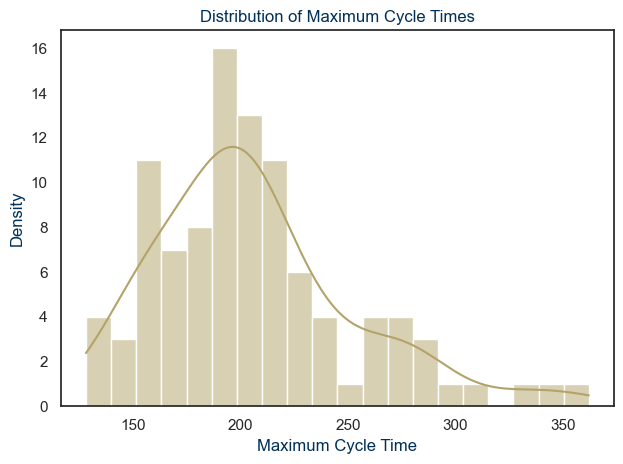

In [ ]:
max_cycles_per_unit = traindf[identification].groupby('unit_no')['cycle_times'].max()

sns.set_style("white")
sns.histplot(
    max_cycles_per_unit,
    kde=True,
    bins=20,
    color='#B3A369',
)


plt.xlabel('Maximum Cycle Time', color='#003057')
plt.ylabel('Density', color='#003057')
plt.title('Distribution of Maximum Cycle Times', color='#003057')
plt.gca().grid(False)

plt.tight_layout()
plt.savefig('max_cycle_dist.png', dpi=300)
plt.show()

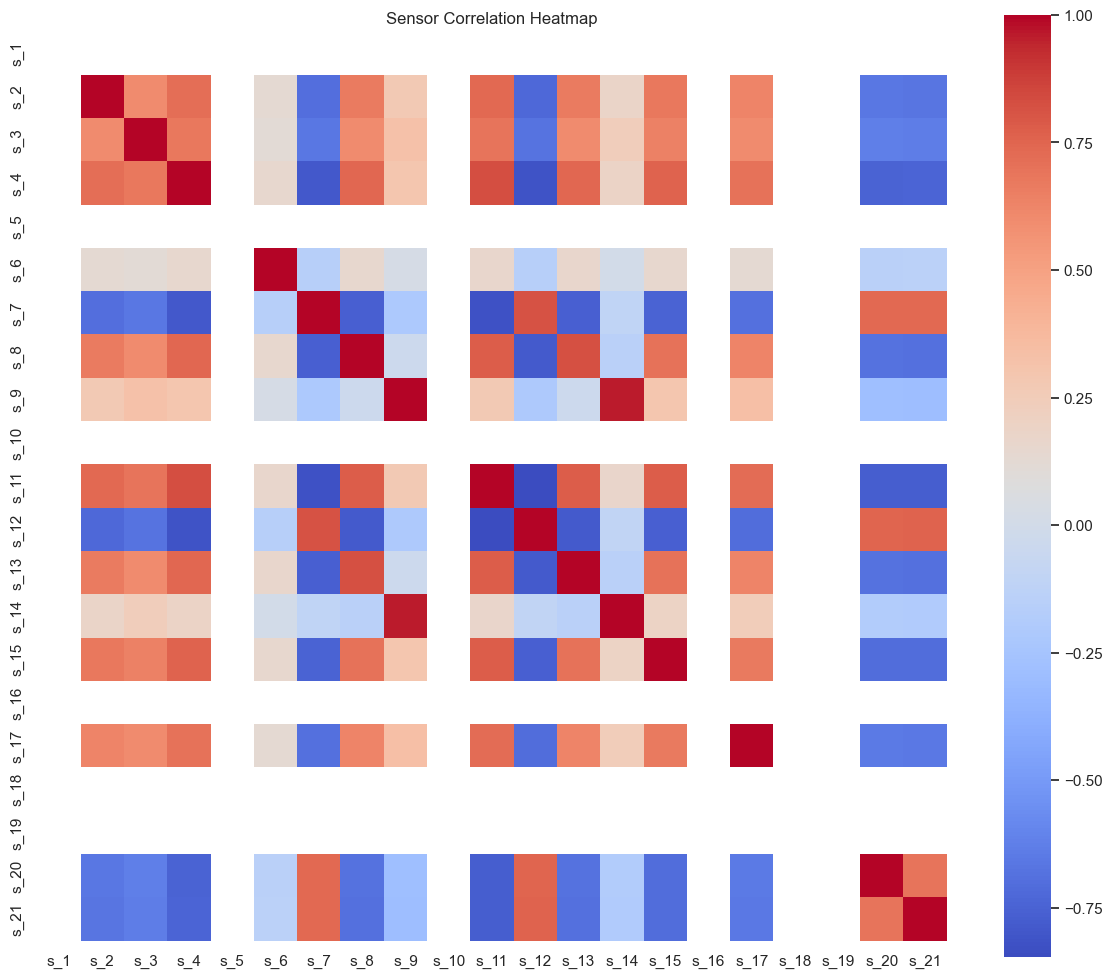

In [ ]:
sensorcols = traindf[sensors]

correlation_matrix = sensorcols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('Sensor Correlation Heatmap')

plt.tight_layout()
plt.savefig('corrplotmain.png', dpi=300)
plt.show()

### <b>EXPLORATORY DATA VISUALIZATION (RUL)</b>

In [ ]:
max_cycle_per_unit = traindf.groupby('unit_no')['cycle_times'].max().reset_index()
max_cycle_per_unit.columns = ['unit_no', 'max_cycle']

traindf = traindf.merge(max_cycle_per_unit, on='unit_no')


traindf['RUL'] = traindf['max_cycle'] - traindf['cycle_times']

traindf.drop(columns=['max_cycle'], inplace=True)

print(traindf[['unit_no', 'cycle_times', 'RUL']].head())

   unit_no  cycle_times  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187


In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(12, 5))
#this is based on every 10th unit as gotten from Peters, K. (2021). kpeters/exploring-nasas-turbofan-dataset. GitHub. Retrieved April 8, 2025, from https://github.com/kpeters/exploring-nasas-turbofan-dataset
    for i in traindf['unit_no'].unique():
        if i % 10 == 0:
            plt.plot(
                traindf[traindf['unit_no'] == i]['RUL'],
                traindf[traindf['unit_no'] == i][sensor_name],
                label=f'Engine {i}',
                alpha=0.7
            )

    plt.xlim(240, 0)
    plt.xticks(np.arange(0, 240, 25))

    plt.xlabel('Remaining Useful Life (RUL)')
    plt.ylabel(sensor_name)
    plt.title(f'Sensor {sensor_name} vs RUL')

    filename = f'sensor_{sensor_name}_rul.png'
    plt.savefig(filename, dpi=300)

    plt.close()



for sensor_name in sensors:
    plot_sensor(sensor_name)

### <b>FINAL DATA WRANGLING</b>

In [ ]:
drop_cols = ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']

traindf = traindf.drop(columns=drop_cols)
testdf = testdf.drop(columns=drop_cols)

In [ ]:
traindf.to_csv('traindf.csv', index=False)
testdf.to_csv('testdf.csv', index=False)